In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [88]:
deliveries =  pd.read_csv('data\deliveries.csv')
matches =  pd.read_csv('data\matches.csv')

In [80]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [112]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [81]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [82]:
matches.season.unique()
#12 season Ipl data is present

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [83]:
print(deliveries.isnull().sum())
deliveries[deliveries['player_dismissed'].notnull()].values.shape[0]
#we can see that total of dismisal of batsman during entire season is 8834

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


8834

# Total Match Played by teams

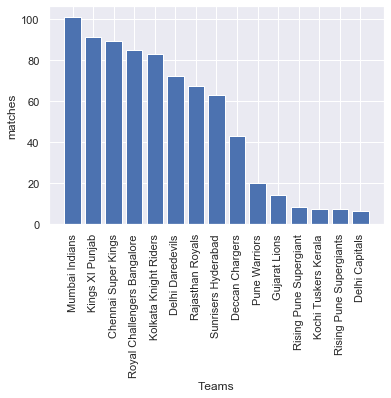

In [84]:
teams = matches.team1.value_counts().index
match = matches.team1.value_counts().values

plt.bar(teams,match)

plt.xlabel("Teams")
plt.ylabel("matches")
plt.xticks(rotation=90)
plt.show()


# Does Toss Play important Role

[]

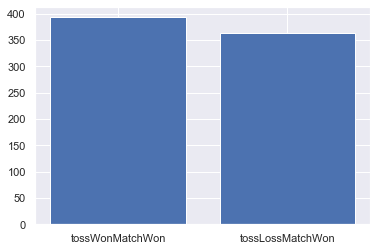

In [85]:


tossWonMatchWon = matches[matches['winner'] == matches['toss_winner']].shape[0]
tossLossMatchWon = matches.shape[0]-tossWonMatchWon
plt.bar(['tossWonMatchWon','tossLossMatchWon'],[tossWonMatchWon,tossLossMatchWon])
plt.plot()

# Now we see which team is Lucky

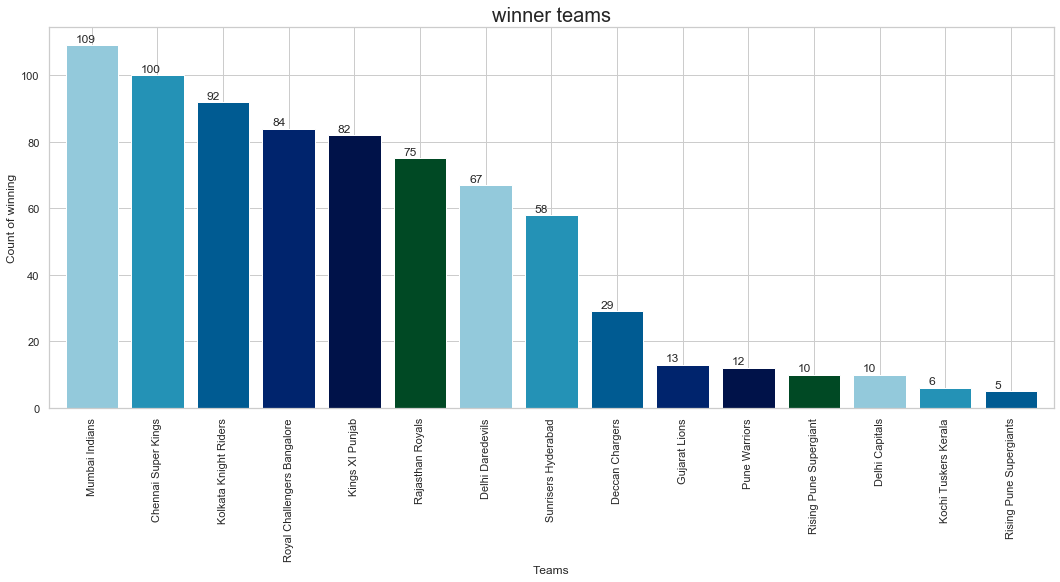

In [90]:
plt.figure(figsize=(18,7))
ax = matches['winner'].value_counts().plot.bar(width=0.8, color=sns.color_palette('ocean_r'))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15, p.get_height()+1))
    
plt.xlabel("Teams")
plt.ylabel("Count of winning")
plt.title("winner teams", fontsize=20)
plt.show()

# Matches win by Teams

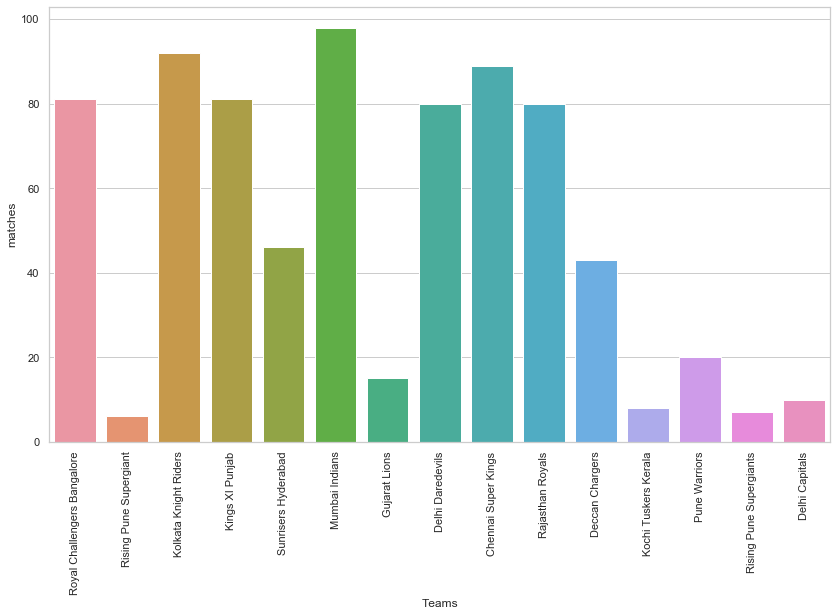

In [86]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.countplot(x=matches.toss_winner)
plt.xlabel("Teams")
plt.ylabel("matches")
plt.xticks(rotation=90)
plt.show()

# lets see where more matches are played

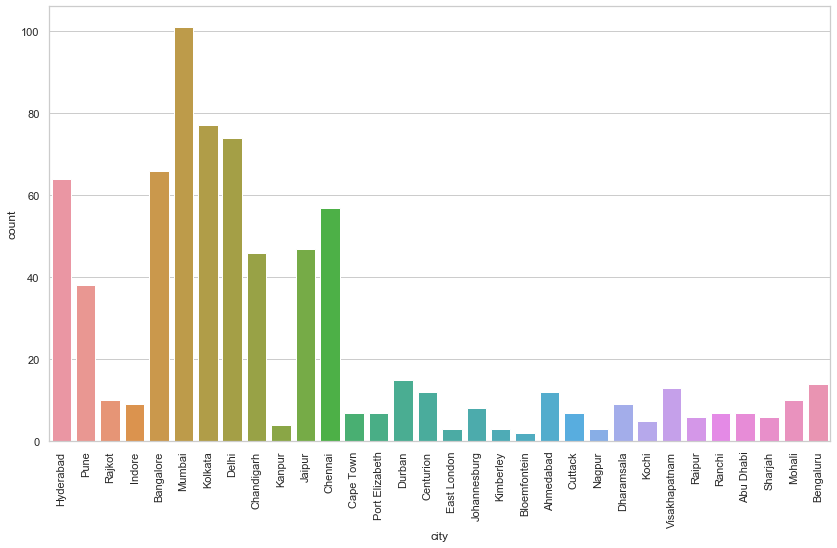

In [93]:
plt.figure(figsize=(14,8))
sns.countplot(x=matches.city)
plt.xticks(rotation=90)
plt.show()

# let see most number of man of the match

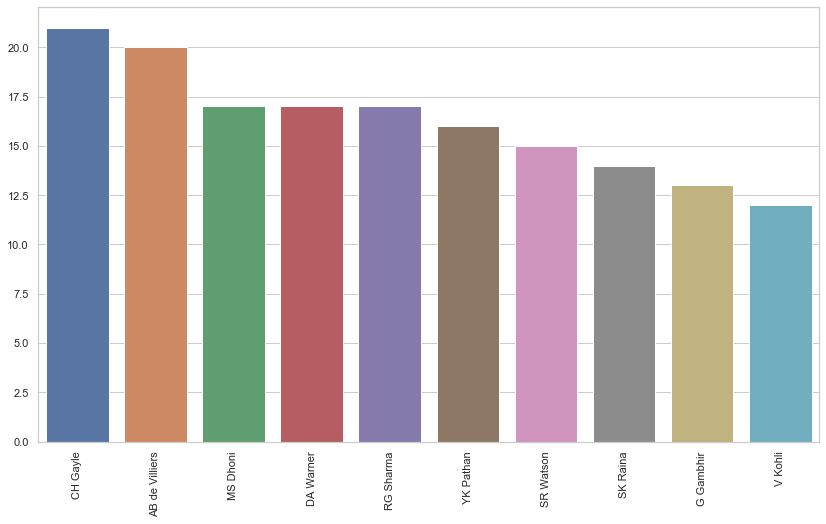

In [104]:
plt.figure(figsize=(14,8))
sns.barplot(matches.player_of_match.value_counts().index[:10],matches.player_of_match.value_counts().values[:10])
plt.xticks(rotation=90)
plt.show()


## Universe Boss in numer one position , Mr 360 at 2nd and Best finiser or Caption cool at 3rd

# lets See Most Run Scored By batsman

In [132]:
players_run = {}
for i in deliveries.values:
    players_run[i[6]]=players_run.get(i[6],0)+(i[15])
    

In [148]:
l1=[i for i in players_run.keys()]
l2=[i for i in players_run.values()]
l3=l2.copy()
l3.sort()
l3.reverse()
l=[]
for i in l3:
    l.append(l2.index(i))
for i in range(10):
    print(l1[l[i]],l3[i])

V Kohli 5434
SK Raina 5415
RG Sharma 4914
DA Warner 4741
S Dhawan 4632
CH Gayle 4560
MS Dhoni 4477
RV Uthappa 4446
AB de Villiers 4428
G Gambhir 4223


# let see 10 ten playes who got out most

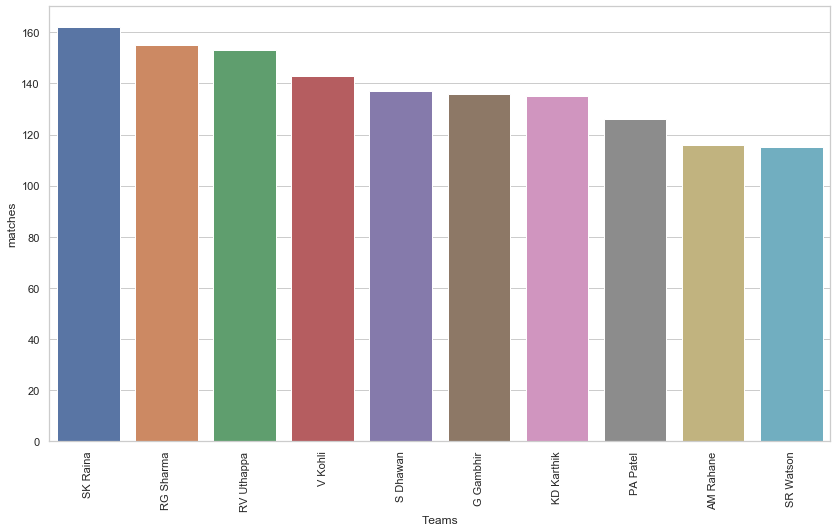

In [157]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.barplot(deliveries.player_dismissed.value_counts().index[:10],deliveries.player_dismissed.value_counts().values[:10])
plt.xlabel("Teams")
plt.ylabel("matches")
plt.xticks(rotation=90)
plt.show()

# Most dismissal_kind    

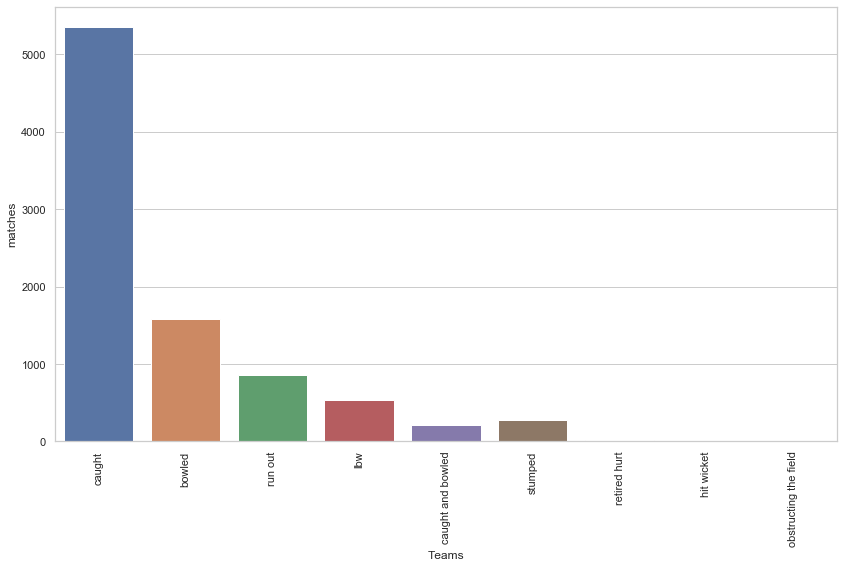

In [158]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.countplot(x=deliveries.dismissal_kind)
plt.xlabel("Teams")
plt.ylabel("matches")
plt.xticks(rotation=90)
plt.show()

# most Work Done by fielder

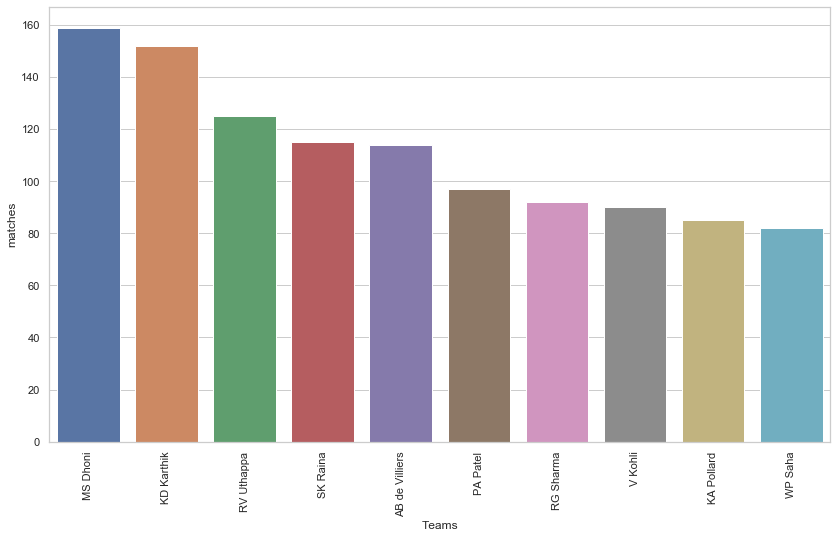

In [159]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.barplot(deliveries.fielder.value_counts().index[:10],deliveries.fielder.value_counts().values[:10])
plt.xlabel("Teams")
plt.ylabel("matches")
plt.xticks(rotation=90)
plt.show()